In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy import fft
from scipy.signal import stft
import soundfile as sf
import IPython.display as ipd

In [3]:
#audio_file = '/Users/riccardomorgana/Desktop/cymbal.wav'
audio_file = 'wavs/wood.wav'
audio, sr = sf.read(audio_file)
print("samplerate: " + str(sr))

if audio.ndim > 1:
    audio = audio[:,0]

ipd.Audio(audio,rate=sr)

#test
#f1 = 440.0 / sample_rate
#f2 = 1440.0 / sample_rate
#x = np.cos(2.0 * np.pi * f1 * np.r_[0:N]) + np.cos(2.0 * np.pi * f2 * np.r_[0:N])


samplerate: 96000


46.9,0.147
140.6,0.233
375.0,0.089
421.9,0.121
468.8,0.135
609.4,0.197
726.6,0.134
843.8,0.129
937.5,0.270
1007.8,0.265
1125.0,0.165
1265.6,0.117
1359.4,0.240
1406.2,0.196
1476.6,0.375
1546.9,0.144
1664.1,0.232
1710.9,0.354
1757.8,0.206
1945.3,0.173
2015.6,0.236
2062.5,0.191
2250.0,0.219
2367.2,0.176
2554.7,0.202
2695.3,0.627
2835.9,0.105
2882.8,0.102
2929.7,0.118
3070.3,0.262
3164.1,0.165
3210.9,0.343
3257.8,0.356
3351.6,0.305
3421.9,0.240
3562.5,0.263
3679.7,0.223
3750.0,0.177
3820.3,0.352
3867.2,0.334
3984.4,0.284
4078.1,0.165
4148.4,0.194
4265.6,0.207
4406.2,1.000
4523.4,0.246
4593.8,0.234
4664.1,0.213
4804.7,0.147
4921.9,0.088
5109.4,0.114
5179.7,0.104
5226.6,0.074
5273.4,0.156
5414.1,0.136
5507.8,0.072
5554.7,0.071
5648.4,0.106
5695.3,0.140
5789.1,0.130
5906.2,0.181
6046.9,0.125
6187.5,0.067
6421.9,0.075
6468.8,0.071
6773.4,0.091
6937.5,0.082
7007.8,0.083
7054.7,0.110
7359.4,0.113
7570.3,0.061
7804.7,0.056
8039.1,0.069
8085.9,0.065
8250.0,0.077
8414.1,0.063
8578.1,0.080
8718.8,0.

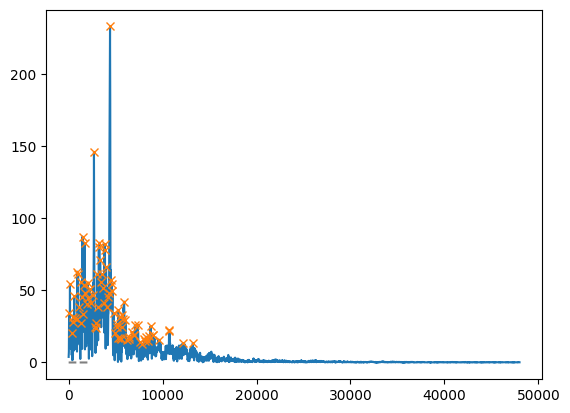

In [13]:
N = 4096
x = audio[0:N]
s = fft.rfft(x)
mag = abs(s) 
magdb = 20*np.log10(mag)
peaks, _ = find_peaks( mag, prominence=10, height=0)

freqs = peaks / N * sr
nbins = N//2
freqline = np.divide(range(0,nbins+1), N) * sr
mags = mag[peaks]
nmags = mags / np.max(mags)

file = open("resonances.txt", "w+")
for f,m in zip(freqs, nmags):
    print("{:.1f}".format(f),end=",")
    print("{:.3f}".format(m), end="\n")
    file.write("{:.1f}".format(f))
    file.write(", ")
    file.write("{:.3f}".format(m))
    file.write("\n")             

file.close

plt.plot(freqline, mag)
plt.plot(freqs, mag[peaks], "x")
plt.plot(np.zeros_like(mag), "--", color="gray")